<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/%20VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [16]:
import os
import pandas as pd

# Defina os diretórios
train_dir = '/content/fruits_v2/train'
test_dir = '/content/fruits_v2/test'
val_dir = '/content/fruits_v2/val'

# Função para criar um DataFrame a partir de um diretório
def create_dataframe_from_directory(directory):
    data_list = []
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):  # Verifique se o arquivo é uma imagem .jpg
                img_path = os.path.join(class_path, filename)
                data = {'img_path': img_path, 'class': class_folder}
                data_list.append(data)
    return pd.DataFrame(data_list)

# Criar DataFrames separados para treinamento, teste e validação
train_df = create_dataframe_from_directory(train_dir)
test_df = create_dataframe_from_directory(test_dir)
val_df = create_dataframe_from_directory(val_dir)

# Salvar os DataFrames em arquivos CSV separados
train_df.to_csv('/content/train_data.csv', index=False)
test_df.to_csv('/content/test_data.csv', index=False)
val_df.to_csv('/content/val_data.csv', index=False)


In [19]:
import os
import pandas as pd

# Defina os diretórios
train_dir = '/content/fruits_v2/train'

# Lista para armazenar os dados
data_list = []

# Loop através dos diretórios e arquivos
for className in os.listdir(train_dir):
    class_path = os.path.join(train_dir, className)
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):  # Verifique se o arquivo é uma imagem .jpg
            img_path = os.path.join(class_path, filename)
            data_list.append({'img_path': img_path, 'class': className})

# Crie o DataFrame a partir da lista de dados
train_df = pd.DataFrame(data_list)

# Se desejar, você pode salvar o DataFrame em um arquivo CSV
train_df.to_csv('/content/train_data.csv', index=False)

In [20]:
import os
import pandas as pd

# Defina os diretórios
test_dir = '/content/fruits_v2/test'

# Lista para armazenar os dados
data_list = []

# Loop através dos diretórios e arquivos
for className in os.listdir(test_dir):
    class_path = os.path.join(test_dir, className)
    for filename in os.listdir(class_path):
        if filename.endswith('.jpg'):  # Verifique se o arquivo é uma imagem .jpg
            img_path = os.path.join(class_path, filename)
            data_list.append({'img_path': img_path, 'class': className})

# Crie o DataFrame a partir da lista de dados
test_df = pd.DataFrame(data_list)

# Se desejar, você pode salvar o DataFrame em um arquivo CSV
test_df.to_csv('/content/test_data.csv', index=False)


In [24]:
from sklearn.model_selection import train_test_split
# Dividir o conjunto de treinamento em treinamento e validação
train_df, valid_df = train_test_split(train_df, test_size=0.1, random_state=0)
# Verificar os tamanhos dos conjuntos resultantes
len(train_df), len(test_df), len(valid_df)

(8592, 1706, 955)

In [25]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8592 entries, 3867 to 9873
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  8592 non-null   object
 1   class     8592 non-null   object
dtypes: object(2)
memory usage: 201.4+ KB
None


In [26]:
print(train_df.head())

                                                img_path         class
3867           /content/fruits_v2/train/Corn/Corn_50.jpg          Corn
11489   /content/fruits_v2/train/Avocado/Avocado_290.jpg       Avocado
5028   /content/fruits_v2/train/Pepper Green/Pepper G...  Pepper Green
6547      /content/fruits_v2/train/Papaya/Papaya_341.jpg        Papaya
7488   /content/fruits_v2/train/Watermelon/Watermelon...    Watermelon


In [27]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  1706 non-null   object
 1   class     1706 non-null   object
dtypes: object(2)
memory usage: 26.8+ KB
None


In [28]:
print(valid_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 5738 to 456
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  955 non-null    object
 1   class     955 non-null    object
dtypes: object(2)
memory usage: 22.4+ KB
None


In [30]:
import pandas as pd

# Função para criar um DataFrame com contagem de classes
def count_classes(df, name):
    class_counts = df['class'].value_counts().reset_index()
    class_counts.rename(columns={"index": "class", "class": f"{name}_counts"}, inplace=True)
    return class_counts

# Crie DataFrames com contagem de classes para treinamento, teste e validação
train_counts = count_classes(train_df, "train")
test_counts = count_classes(test_df, "test")
valid_counts = count_classes(valid_df, "valid")

# Mesclar os DataFrames com contagens
df = train_counts.merge(test_counts, on='class', how='outer').merge(valid_counts, on='class', how='outer')

# Preencher valores ausentes (caso haja) com 0
df.fillna(0, inplace=True)

print(df)


                 class  train_counts  test_counts  valid_counts
0           Grape Blue           489          100            58
1                 Pear           377           70            44
2               Tomato           369           75            46
3           Pepper Red           338           67            47
4              Apricot           260           50            23
5               Papaya           259           50            28
6        Passion Fruit           258           49            26
7               Orange           257           49            27
8   Apple Granny Smith           255           50            30
9               Cherry           253           50            27
10              Banana           252           49            28
11        Cactus fruit           251           49            35
12               Limes           250           49            28
13          Clementine           250           49            21
14           Raspberry           250    

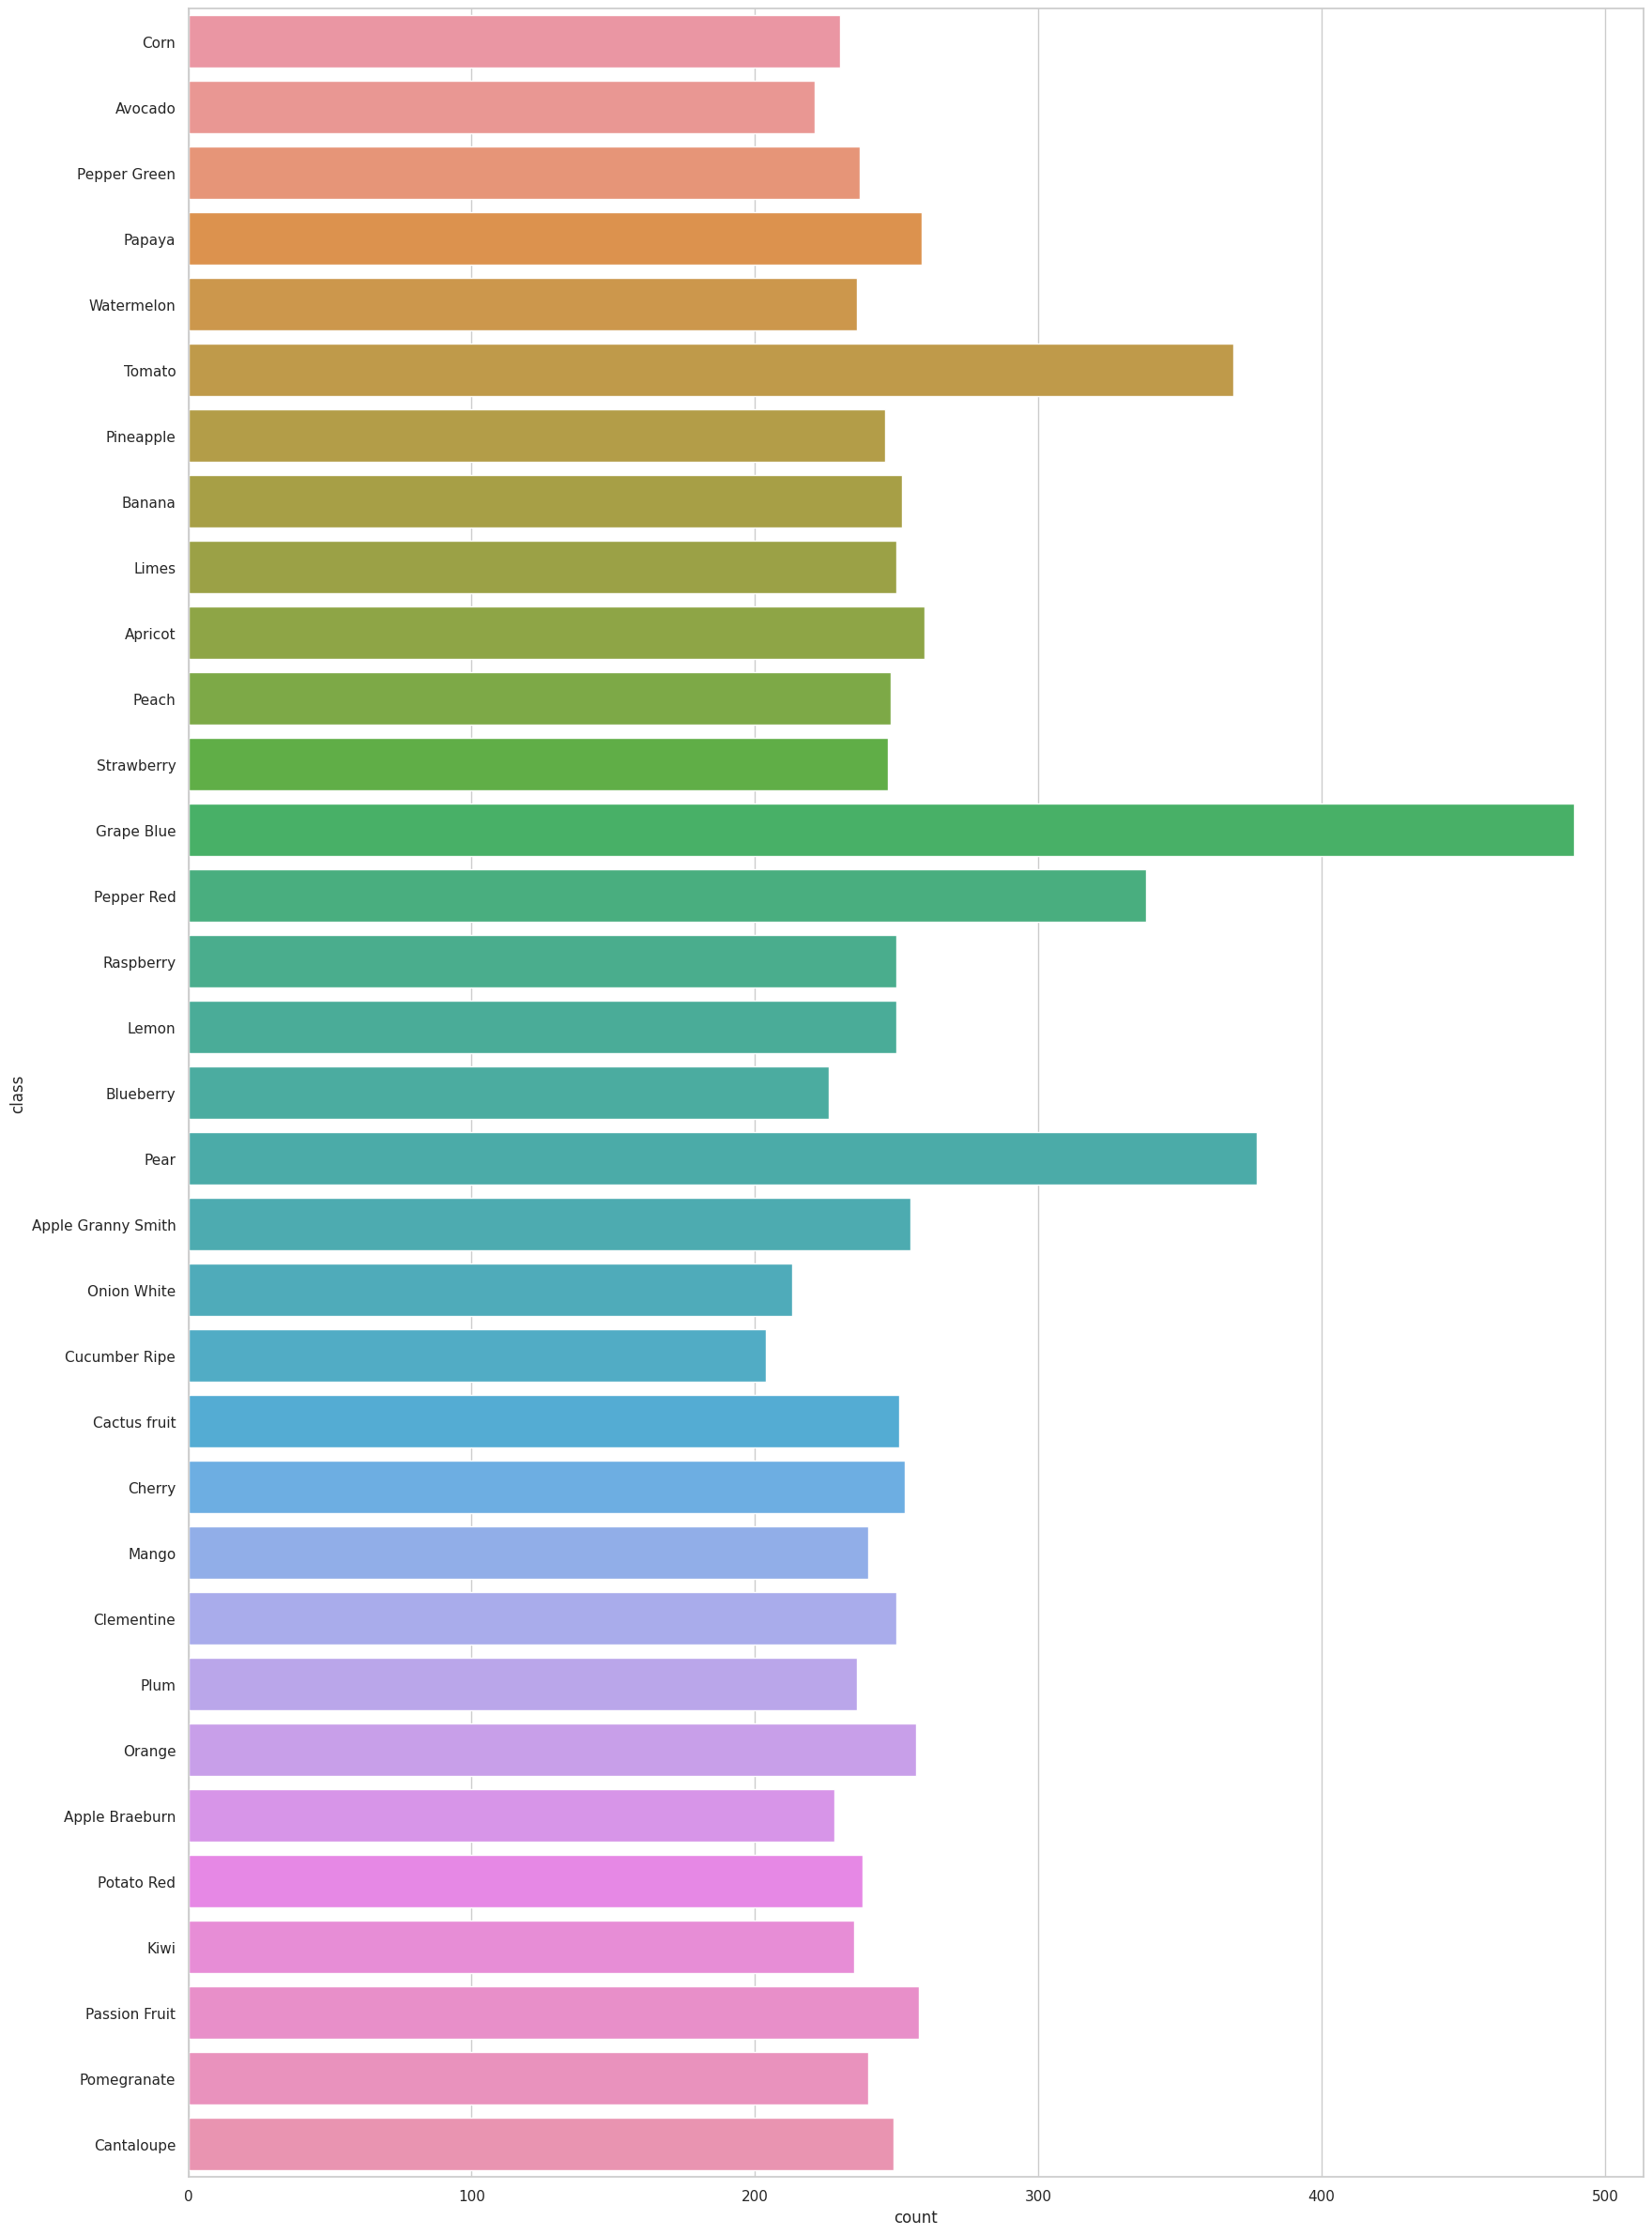

In [31]:
# Visualization (No of samples in each class of training data)
plt.figure(figsize=(20,30))
g=sns.countplot(y='class',data=train_df)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

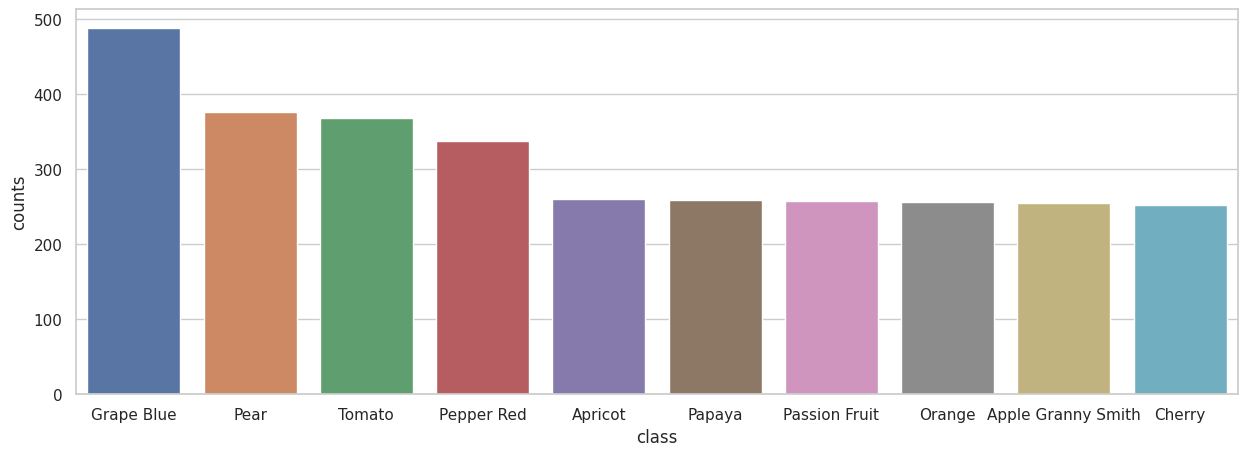

In [32]:
#top 10 classes in training data (highest number of samples)
tf=train_df['class'].value_counts()[:10]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

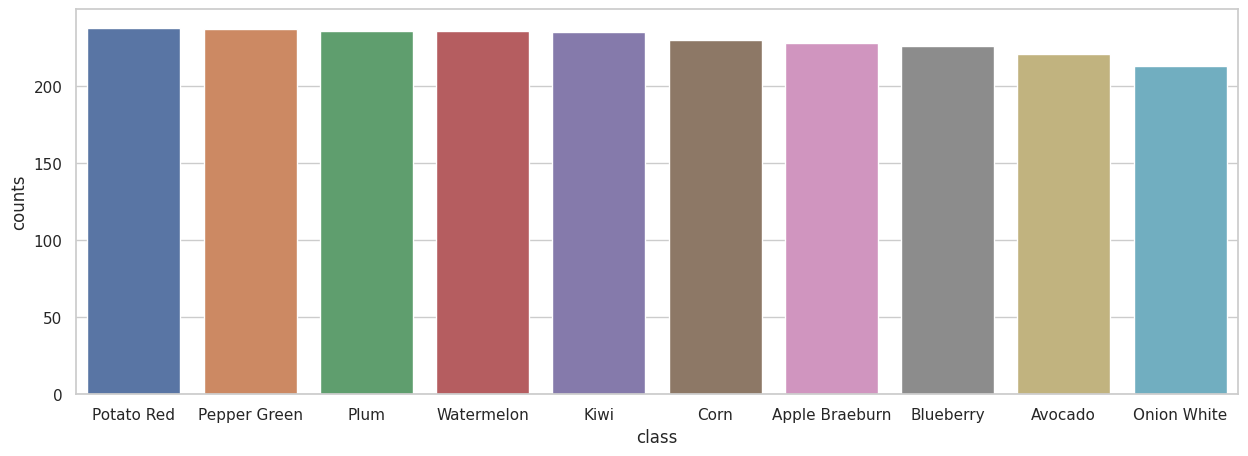

In [33]:
#bottom 10 classes in training data (lowest number of samples)
tf=train_df['class'].value_counts()[-11:-1]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

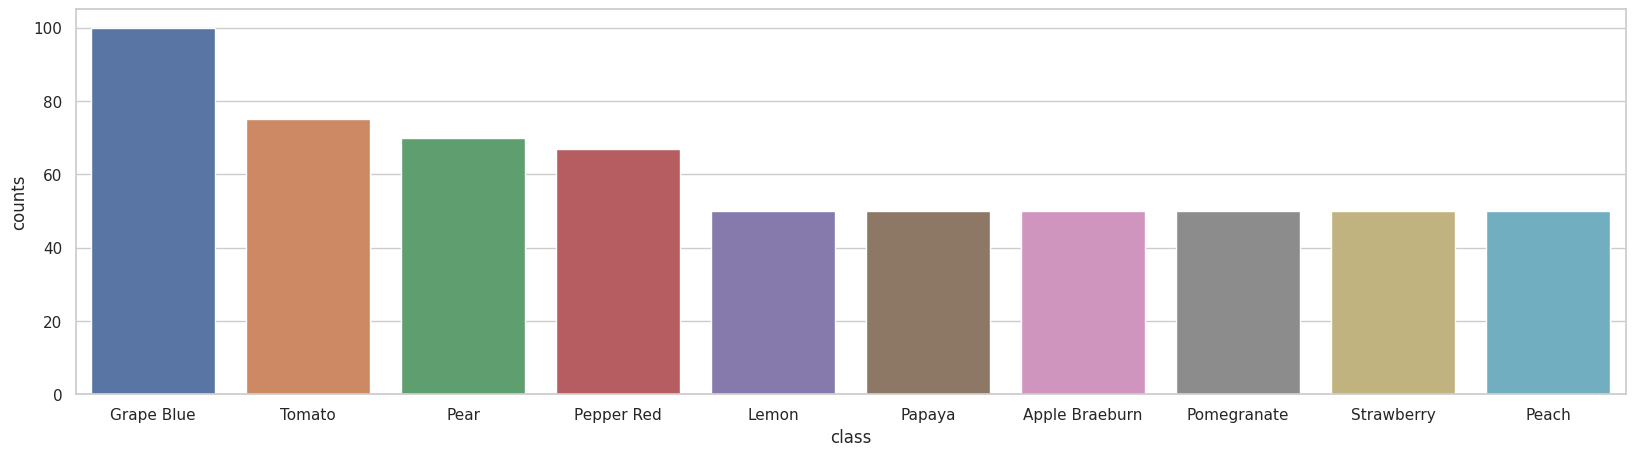

In [34]:
#top 10 classes in testing data(highest number of samples)
tf=test_df['class'].value_counts()[:10]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(20,5))
g=sns.barplot(x='class',y='counts',data=tf)

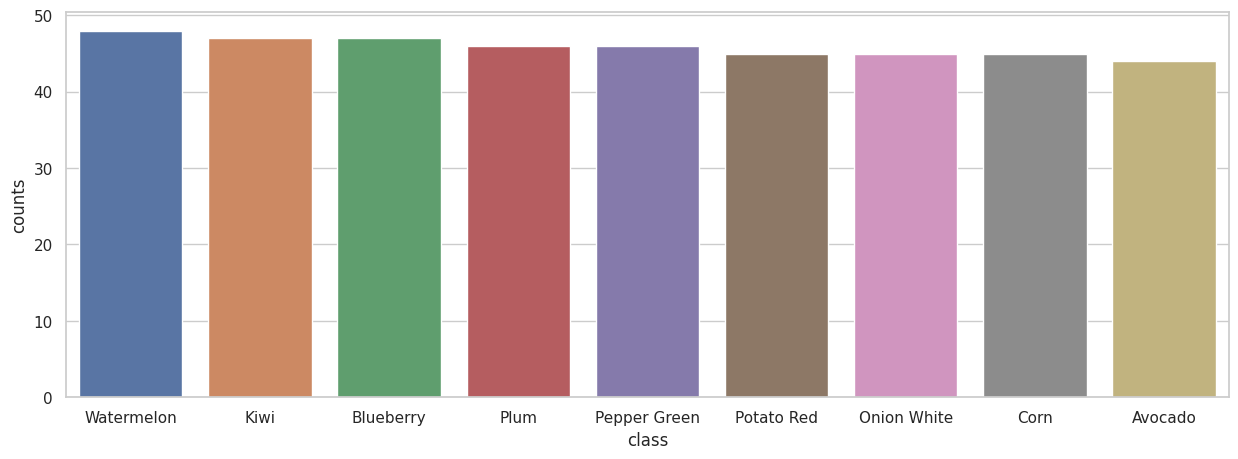

In [35]:
#bottom 10 classes in testing data(lowest number of samples)
tf=test_df['class'].value_counts()[-10:-1]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)


In [36]:
img=cv2.imread(train_df['img_path'][1])
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f'The size of image is {img.shape}')

The size of image is (100, 100, 3)


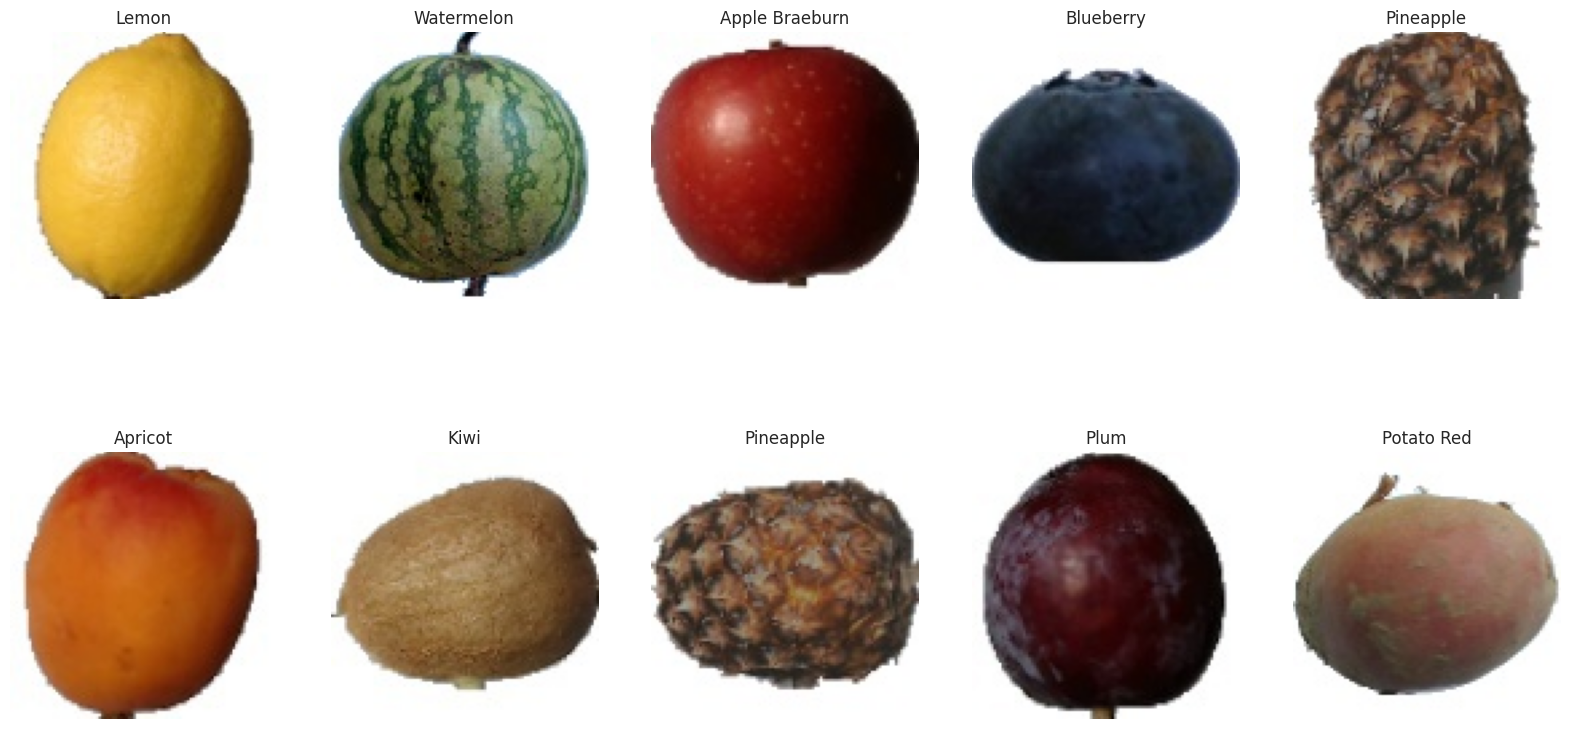

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Plot 10 imagens aleatórias de frutas do conjunto de treinamento
plt.figure(figsize=(20, 10))
for i in range(10):
    rand_int = np.random.randint(0, len(train_df))  # Certifique-se de que o índice está dentro dos limites válidos
    img_path = train_df['img_path'].iloc[rand_int]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')  # Desligar as grades
    plt.title(train_df['class'].iloc[rand_int])



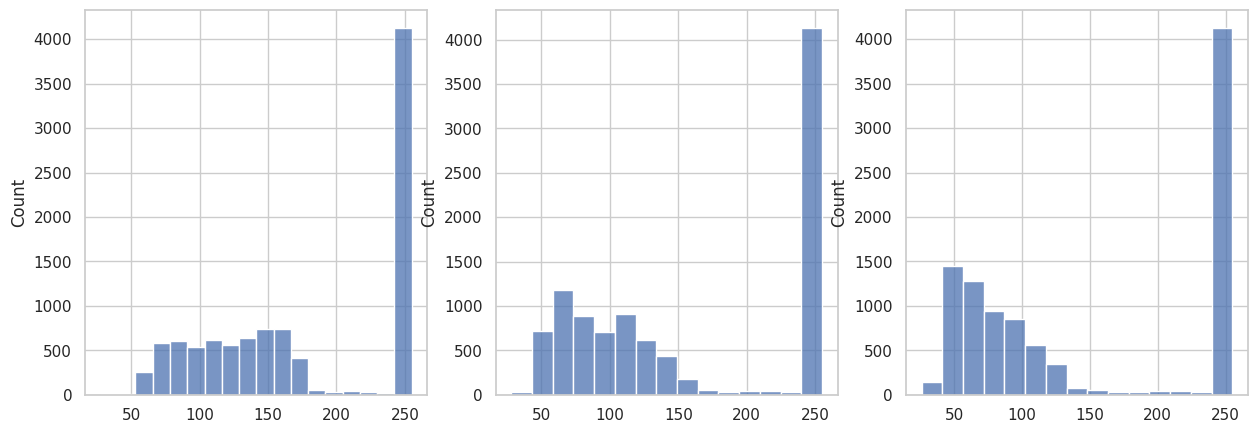

In [40]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
g1=sns.histplot(data=img[:,:,0].ravel(),ax=axes[0])
g2=sns.histplot(data=img[:,:,1].ravel(),ax=axes[1])
g3=sns.histplot(data=img[:,:,2].ravel(),ax=axes[2])

In [41]:
train_df.head()

,img_path,class
3867,/content/fruits_v2/train/Corn/Corn_50.jpg,Corn
11489,/content/fruits_v2/train/Avocado/Avocado_290.jpg,Avocado
5028,/content/fruits_v2/train/Pepper Green/Pepper G...,Pepper Green
6547,/content/fruits_v2/train/Papaya/Papaya_341.jpg,Papaya
7488,/content/fruits_v2/train/Watermelon/Watermelon...,Watermelon


In [43]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
x_col="img_path",
y_col='class',
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

validation_generator=train_datagen.flow_from_dataframe(
dataframe=valid_df,
x_col="img_path",
y_col='class',
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
x_col="img_path",
y_col='class',
batch_size=1,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

Found 8592 validated image filenames belonging to 33 classes.
Found 955 validated image filenames belonging to 33 classes.
Found 1706 validated image filenames belonging to 33 classes.


In [44]:
train_generator.image_shape

(224, 224, 3)

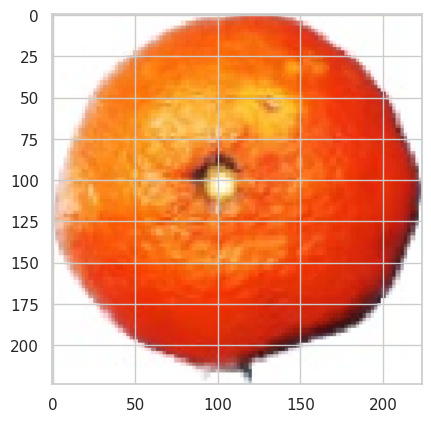

In [45]:
img1=train_generator.next()[0]
fig=plt.imshow(img1[0,:,:,:])

In [46]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model
from keras.callbacks import EarlyStopping
import keras

In [47]:
model=VGG16(input_shape=(224,224,3), weights='imagenet')
earlystopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=3 )

553467096/553467096 [==============================] - 6s 0us/step


In [48]:
for layer in model.layers[:-1]:
    layer.trainable=False
#for layer in model.layers[15:]:
    #layer.trainable=True

In [49]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [50]:
pretrained_last_layer=model.get_layer(name=model.layers[-2].name)
pretrained_output=pretrained_last_layer.output
next_layer= layers.Dense(131, activation='softmax')(pretrained_output)
pretrained_vgg = Model(model.input, next_layer)

In [51]:
pretrained_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:
from tensorflow import keras

# Escolha entre 'categorical_crossentropy' ou 'sparse_categorical_crossentropy' com base no tipo de rótulos
loss = 'categorical_crossentropy'  # Use este para rótulos "one-hot encoded"

# Verifique o formato dos rótulos (por exemplo, se for "one-hot encoded")
one_hot_labels = True  # Defina como True se os rótulos forem "one-hot encoded"

if one_hot_labels:
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
else:
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile o modelo com a função de perda correta
pretrained_vgg.compile(loss=loss, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [55]:
# Verifique os dados carregados a partir do gerador de treinamento
for data_batch, labels_batch in train_generator:
    # Examine os dados e rótulos deste lote
    print("Dados do lote:")
    print(data_batch)
    print("Rótulos do lote:")
    print(labels_batch)
    break  # Interrompa após uma iteração para evitar imprimir muitos dados


Dados do lote:
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.  

In [56]:
batch_size=64
history=pretrained_vgg.fit(train_generator,validation_data=validation_generator,epochs=8,callbacks=earlystopping)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5577: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


InvalidArgumentError: ignored

In [ ]:
https://www.kaggle.com/code/himakshi2110/fruit-360-classification-using-vgg16